# Project
# **Investigate Hotel Business using Data Visualization**

Author : Prathmesh Jani

---
<br>

**Table of Content:**
- Introduction
- Load Dataset
- Data Exploration
- Data Cleansing
- Data Visualization
<br>
<br>

# **Introduction**

**Background** <br>
Business performance analysis is an important key for companies to achieve success in their business. Companies can carry out an analysis to identify their problems, weaknesses, and strengths. In the hospitality business, it is important to understand customer behavior. By understanding customer behavior, companies can find out what factors influence customers in making hotel reservations. In addition, companies can also identify which products or services are not selling well in the market. This is done to adjust the appropriate business strategy so that the company can improve customer experience and achieve long-term business goals.<br>
<br>

**Business Questions** <br>
- What types of hotels are most frequently visited by customers?
- Does the length of stay affect the cancellation rate of hotel bookings?
- Does the time gap between a hotel reservation and the day a guest arrives affect the cancellation rate of hotel bookings?<br>
<br>

**Objective** <br>
Create data-based visualizations as insights for the hotel business
<br>
<br>

# **Load Dataset**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('J:/Portfolio Projects/Python/hotel_bookings_data.csv')

In [3]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
61399,City Hotel,1,322,2018,February,50,9,0,2,2,...,0,Non Refund,20.0,NaN,0,Personal,52.0,0,0,Canceled
20320,Resort Hotel,0,0,2018,March,4,23,0,1,2,...,0,No Deposit,NaN,NaN,0,Personal,45.0,0,0,Check-Out
42282,City Hotel,0,4,2017,November,36,4,0,2,2,...,0,No Deposit,9.0,NaN,0,Contract,124.0,1,1,Check-Out


<br>
<br>

# **Data Exploration**
Conduct initial investigation of the data to understand the characteristics and information contained therein.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Key Takeaways :
- The dataset has **119390** records and **29** features
- Data types : **object, float64, int64**
- There are **33261 duplicate data**
<br>
<br>

In [5]:
# check value of each feature
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

Key Takeaways:
- There are **'Undefined'** values in the `meal`, `market_segment`, `distribution_channel` features. Further analysis will be carried out whether the value needs to be handled or not
- **`company`** and **`agent`** features have a float value, possibly referring to an encoded id or **value**
- Features that show the number of guests namely `adults`, `children`, and `babies` will be further analyzed to find out whether there are anomalous data
<br>
<br>

### Checking Null Values
---

In [6]:
# check missing value
((df.isna().sum())/len(df)*100).round(2).sort_values(ascending=False)

company                           94.31
agent                             13.69
city                               0.41
hotel                              0.00
distribution_channel               0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
market_segment                     0.00
is_canceled                        0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_weekdays_nights           0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00


Key Takeaways :
- There is a **missing/null value** in the **`company`**, **`city`**, **`children`**, **`agent`** features
- Imputation of values will be carried out on the missing value
<br>
<br>

### Checking Duplicated Data
---

In [7]:
# Check duplicate data 
df.duplicated().sum()

33261

Key Takeaways :
- Duplicate data will be deleted and leave one unique value
<br>
<br>

### Statistical Descriptive
---

#### Numerical Feature

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


- `adr` feature, **Averange Daily Rate** (room revenue/number of room sold) has a **negative value**. This is an **anomaly** and needs to be dropped.
<br>
<br>

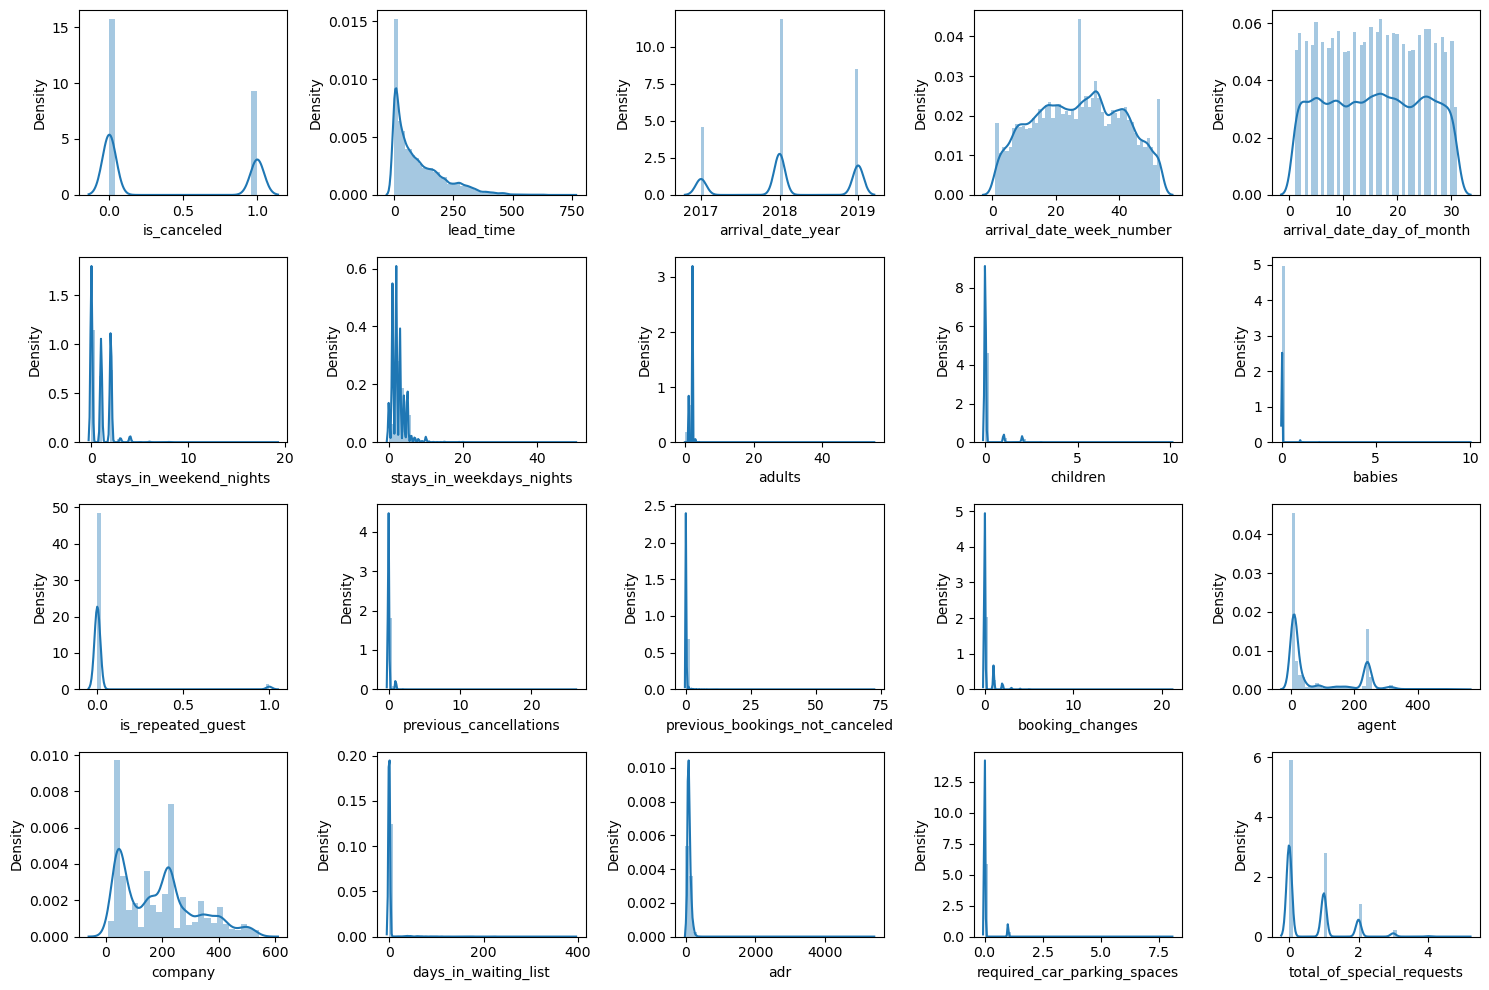

In [9]:
# check the distribution of numerical features
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

Key Takeaways:
- Overall features tend to be **positively skewed**
- `arrival_date_week_number` and `arrival_date_day_of_month` are normally distributed 
<br>
<br>

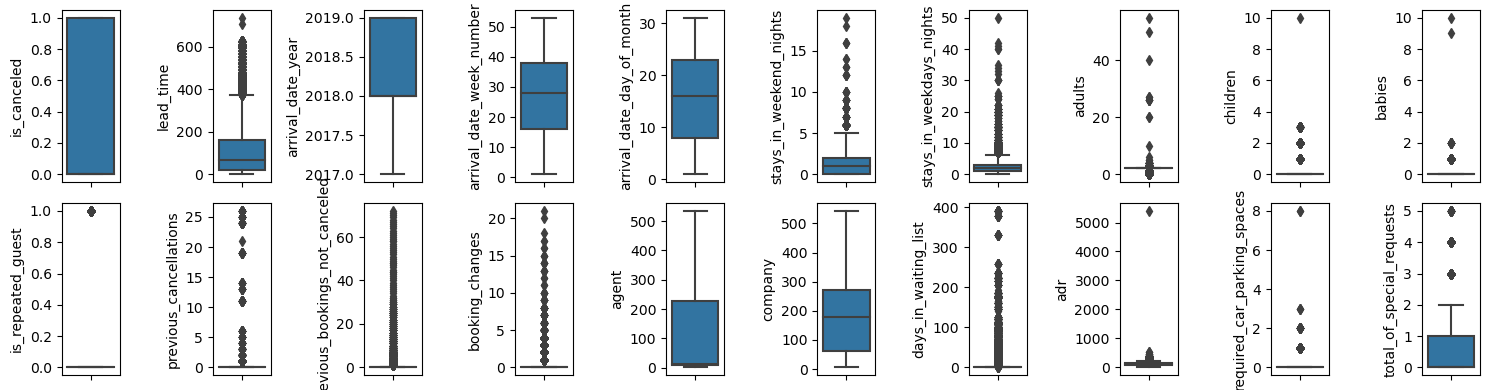

In [10]:
# check the numerical feature outliers
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Key Takeaways:
- Overall, majority features have outliers
- Seen **extreme values** in `adr`, `required_car_parking_spaces`, `children` and `babies` features
- Handling outliers will be carried out to remove only extreme values, so as not to reduce the resulting insight
<br>
<br>

Check guest anomaly data = 0 or there are rooms booked but no guests are staying

In [11]:
guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

Key takeaways:
- There are **180 rooms without guests**
- This data will later be **drop**
<br>
<br>

#### Categorical Feature

In [12]:
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


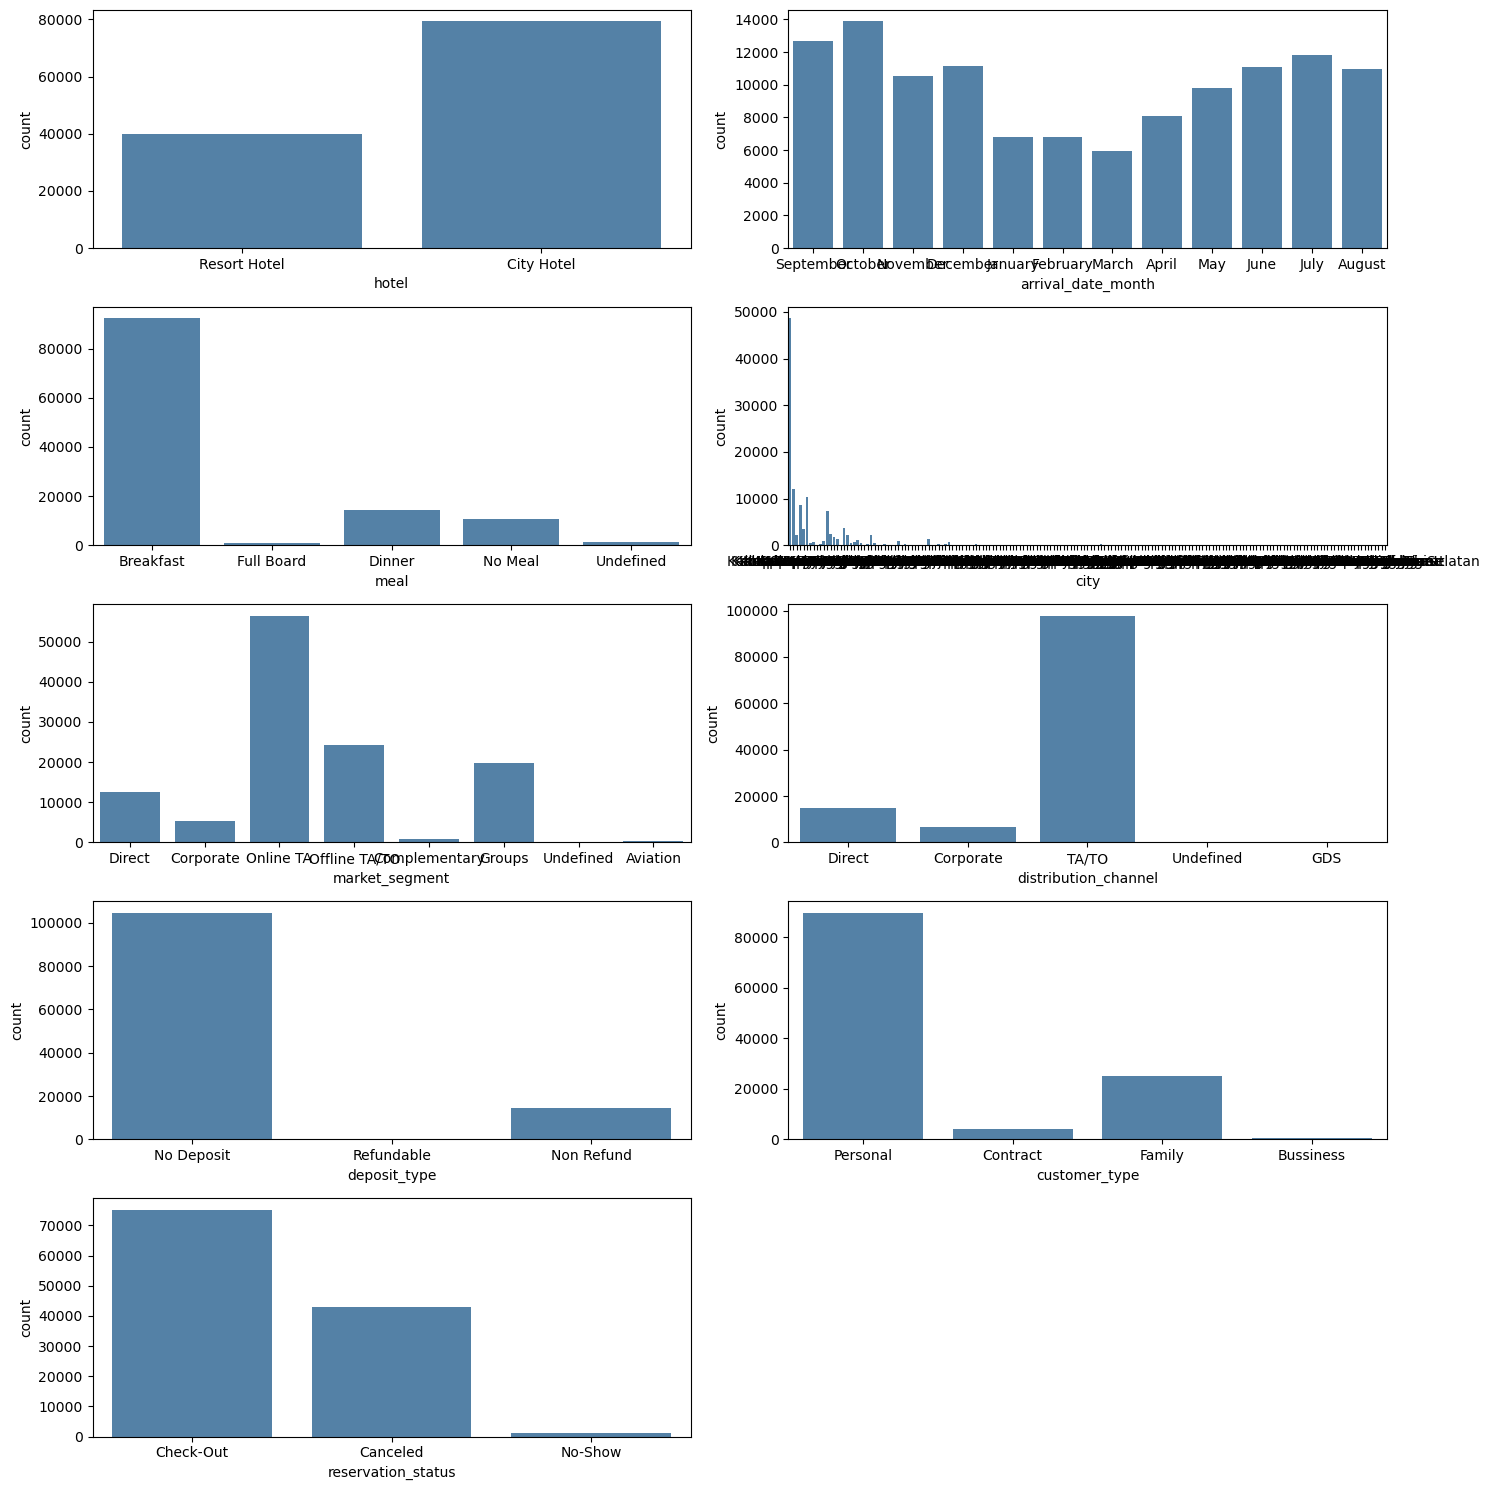

In [13]:
# check the distribution of categorical features
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(15, 15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='steelblue')
    plt.tight_layout()

<br>
<br>

# **Data Cleansing**

In [14]:
df_clean = df.copy()

### Handling Null Values
---

Features that contain null values **`company, city, children, agent`** <br>
treatment :
- `company` - null value **filled with 0**, indicates the guest is not from the company
- `agent` - null value **filled with 0**, indicating the guest made a reservation independently or not through an agent
- `children` - null value **insert 0**, indicating the guest is not bringing children
- `city` - null values are filled with **'Undefined'**, because the city is not known exactly.

In [15]:
# company, agent, children
ft = ['company', 'children', 'agent']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# ----------------------------------------------------------------
# city
df_clean['city'].fillna('Undefined', inplace=True)

In [16]:
df_clean.isna().sum().sum()

0

<br>

### Handling Inconsistent and Extreme Values
---

The **`meal`** feature can be categorized into 2 namely 'With Meal' and 'No Meal'
- **'With Meal'** = Breakfast, Full Board, Dinner
- **'No Meal'** = No Meal, Undefined

In [17]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [18]:
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

<br>

The **`Children`** feature should use an integer datatype

In [19]:
df_clean['children'] = df_clean['children'].astype('int64')

<br>
Removes extreme values ​​in data

In [20]:
# extreme adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

# --------------------------------------------------------------------------------
# required_car_parking_spaces
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

# --------------------------------------------------------------------------------
# babies
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# --------------------------------------------------------------------------------
# babies
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# --------------------------------------------------------------------------------
# no guests
index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

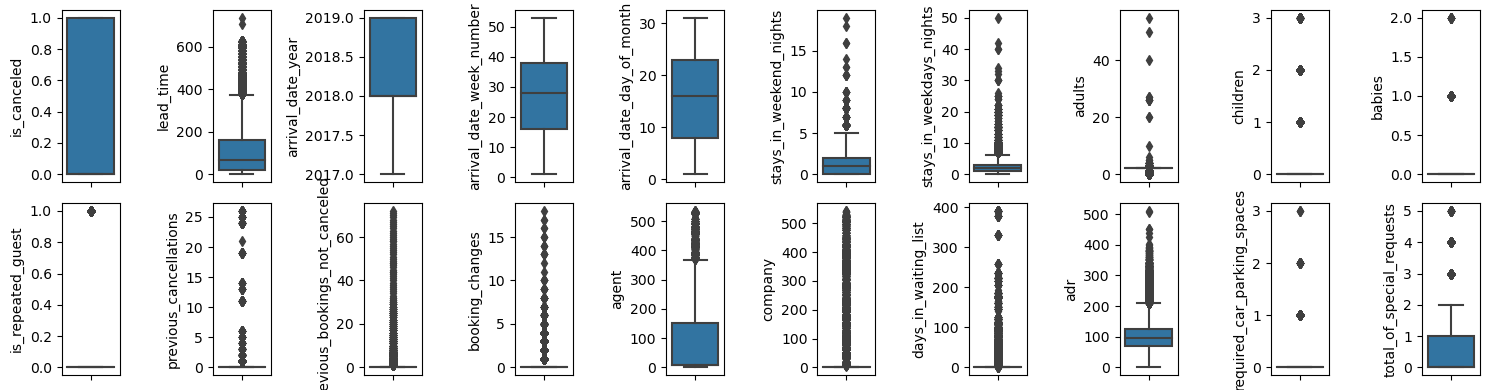

In [21]:
# check the numerical feature outliers
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums[i]], orient='v')
    plt.tight_layout()

<br>

### Handling Duplicated Data
---

In [22]:
df_clean.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
13857,Resort Hotel,0,7,2018,March,4,18,1,3,1,...,0,No Deposit,0.0,94.0,0,Personal,27.0,0,0,Check-Out
21805,Resort Hotel,0,81,2018,May,11,9,0,3,1,...,1,No Deposit,115.0,0.0,0,Family,49.0,0,0,Check-Out


In [23]:
## drop duplicate data
# df_clean.drop_duplicates(keep='first', inplace=True)

Based on further analysis, duplicate data will not be deleted. This is because:
- The large number and elimination of duplicate data affects the statistical value in the analysis
- In the dataset there is no unique_id/unik_booking_id and date, duplicate data may contain important information. There may be the same order occurring at different times.

In [24]:
print('Total Records Before Cleaned :', df.shape[0])
print('Total Records After Cleaned :', df_clean.shape[0])

Total Records Before Cleaned : 119390
Total Records After Cleaned : 119203


# **Data Visualization**

## **Monthly Hotel Booking Analysis Based on Hotel Type**

This analysis focuses on seeing trends in hotel bookings for each type of hotel.

In [25]:
# read dataset that has been cleaned before
df_c = df_clean.copy()

### Ratio Total Booking 
---

In [26]:
# summary percentage of total bookings
# hotel feature group and aggregation using count
hotel_type = df_c.groupby('hotel')[['hotel']].count()
#-------------------------------------------------------------------
hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79160
1,Resort Hotel,40043


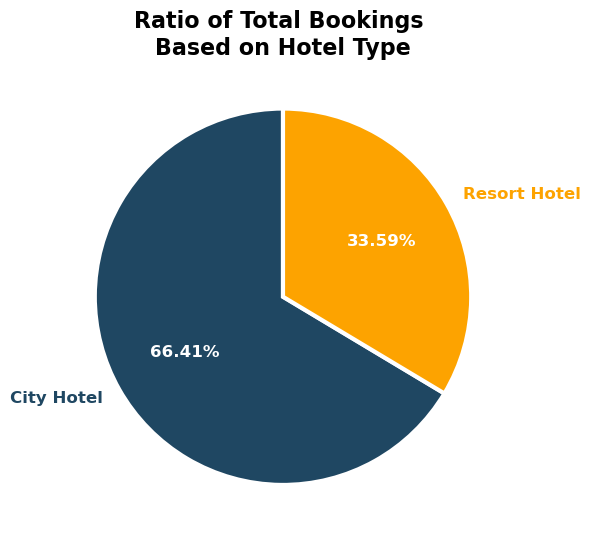

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    hotel_type['total'], labels=hotel_type['hotel'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Ratio of Total Bookings \nBased on Hotel Type', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

Key takeaways:
- **City Hotel is 66.41% more booked by customers**.
- It is suspected that the majority of customers who book Hotel City are **travelers who have main activities around where they stay**, not their main goal to do activities at the hotel.
- City hotels are usually located in city centers or urban areas, close to tourist attractions and businesses. They are usually designed to provide convenience and ease of access to amenities and activities in a city, such as restaurants, shopping centers, and tourist attractions.
- While another 33.59% are Resort Hotel customers. Customers who book this hotel allegedly have the goal of vacationing and relaxing in this place because resort hotels are usually located in beautiful places such as beaches, mountains, or quiet rural areas and have complete facilities. <br>
<br>

### Ratio Total Booking per Month
---

In [28]:
# make a summary of the aggregation of total bookings per month
monthly_booking = df_c.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7593
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3729
8,City Hotel,May,2,6433
9,City Hotel,November,2,7392


It can be seen that the majority of the numbers for each month in the dataset have numbers in colon nunique 2 except for **October** and **Septemper**. This can certainly affect the value of the calculation and the results may not be valid. To overcome this, normalization is carried out by calculating the **average** (total/nunique).

#### Normalization

In [29]:
# calculates the average of the count divided by the nunique
monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7593,3796.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3729,1864.0
8,City Hotel,May,2,6433,3216.0
9,City Hotel,November,2,7392,3696.0


#### Sort Month Value

In [30]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#---------------------------------------------------------------------------------------------
monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3729,1864.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3331,1666.0,May
8,City Hotel,May,2,6433,3216.0,May


#### Visualization

Text(10, 4800, 'Holiday Season II')

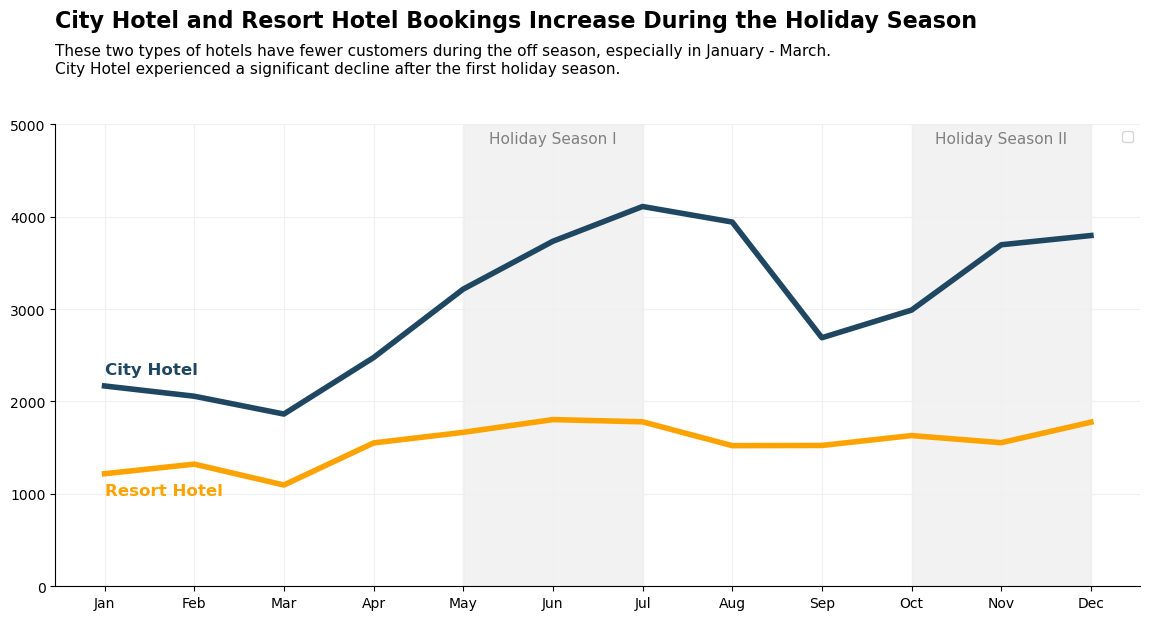

In [31]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# make plots
sns.lineplot(x='month', y='average', hue='hotel', data= monthly_booking, palette=['#1f4762', '#fda300'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0,5000)

# -----------------------------------------------------------------------------------------------------------------------------
# set labels
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# -----------------------------------------------------------------------------------------------------------------------------
# legend
plt.legend([])
plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#1f4762', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#fda300', ha='left', fontweight='bold')

# -----------------------------------------------------------------------------------------------------------------------------
# add a title and description
plt.title('City Hotel and Resort Hotel Bookings Increase During the Holiday Season', fontsize=16, pad=70, loc='left',fontweight='bold')
plt.text(y = 5700, x = -0.55, s = 'These two types of hotels have fewer customers during the off season, especially in January - March. \nCity Hotel experienced a significant decline after the first holiday season.', 
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------------------------
#set holiday season I
plt.stackplot([4, 5, 6], [5000], color='grey', alpha=0.1)
plt.text(x=5, y=4800, s='Holiday Season I', fontsize=11, color='grey', ha='center')

#set holiday season II
plt.stackplot([9, 10, 11], [5000], color='grey', alpha=0.1)
plt.text(x=10, y=4800, s='Holiday Season II', fontsize=11, color='grey', ha='center')


Key Takeaways:
- During the holiday season, hotel bookings tend to increase.
- Bookings for both types of hotels during the month period **May - August** had the highest value, especially for City Hotels which experienced a significant increase in that time period. This could be due to **2017-2019** in May - August apart from **school holidays**, it also coincides with **many national holidays** such as collective leave and religious events such as Ramadan and Eid. So that there are many opportunities for people to take advantage of their time for vacations, visiting out of town, and making hotel reservations. Whereas during the holiday season **October - December** coincides ahead with Christmas and **New Year**.
- The lowest order rate occurred in the period January - March. This can be due to very few national holidays, the start of a new school year for students, and having business travel activities that are not busy because it is still early in the year.

 <br>
 <br>

## **Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rate**
This analysis focuses on seeing the trend between the duration of stay and the cancellation rate of hotel bookings.


### Total Cancelation Rate
---

In [32]:
df_city = df_c[df_c['hotel']=='City Hotel']

# feature group iscanceled and aggregation using count
cancel = df_city.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,46082
1,Canceled,33078


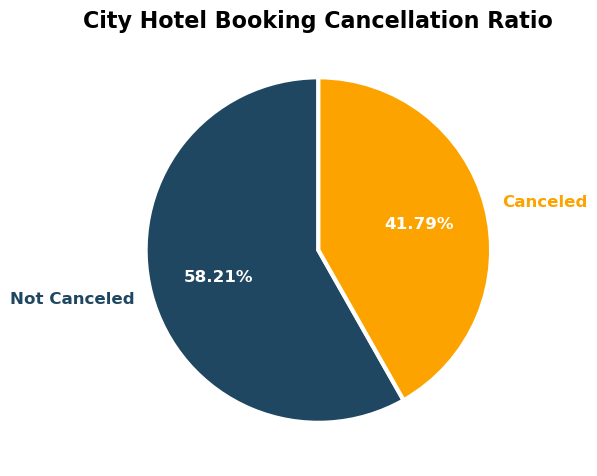

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('City Hotel Booking Cancellation Ratio', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

In [34]:
df_resort = df_c[df_c['hotel']=='Resort Hotel']

# feature group iscanceled and aggregation using count
cancel = df_resort.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel


,is_canceled,total
0,Not Canceled,28924
1,Canceled,11119


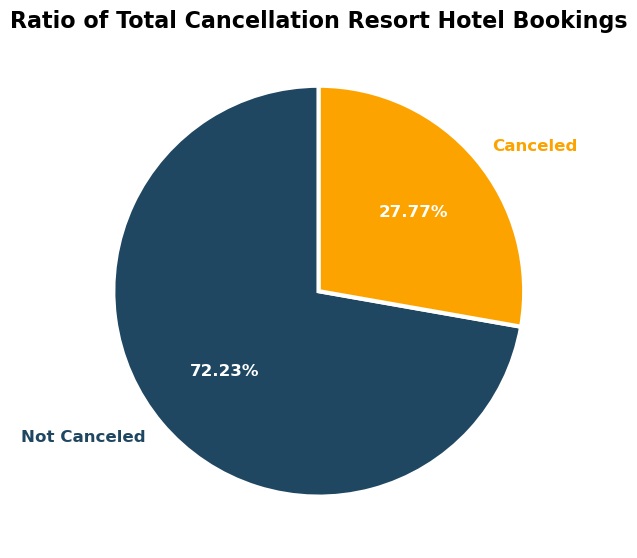

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Ratio of Total Cancellation Resort Hotel Bookings', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

City hotels also have a higher cancellation rate than resort hotels. This shows that many customers who book City Hotels tend to cancel their orders more often. City Hotels have a more centralized location in the city or urban area and are close to tourist and business spots, predictably many activities have to be arranged and perhaps due to other factors, many customers cancel their orders.<br>
<br>

### Stay Duration
---

How long the duration of the stay booked by the customer can be seen in the `stays_in_weekdays_nights` and `stays_in_weekend_nights` features

In [36]:
# total stay
df_c['total_stay_duration'] = df_c['stays_in_weekdays_nights'] + df_c['stays_in_weekend_nights']
df_c.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
89221,City Hotel,0,52,2018,July,21,15,2,2,2,...,No Deposit,7.0,0.0,0,Personal,92.28,0,1,Check-Out,4
95147,City Hotel,0,7,2018,October,33,12,1,2,2,...,No Deposit,9.0,0.0,0,Personal,175.67,1,1,Check-Out,3
66700,City Hotel,1,135,2019,June,17,23,2,0,2,...,Non Refund,171.0,0.0,0,Personal,90.00,0,0,Canceled,2
27800,Resort Hotel,0,1,2018,November,37,8,0,3,2,...,No Deposit,240.0,0.0,0,Personal,191.00,1,1,Check-Out,3
99091,City Hotel,0,56,2018,December,41,5,0,4,2,...,No Deposit,83.0,0.0,0,Personal,123.84,0,0,Check-Out,4


To see the length of stay duration in the dataset, it can be seen from the histogram distribution

<Axes: xlabel='total_stay_duration', ylabel='Count'>

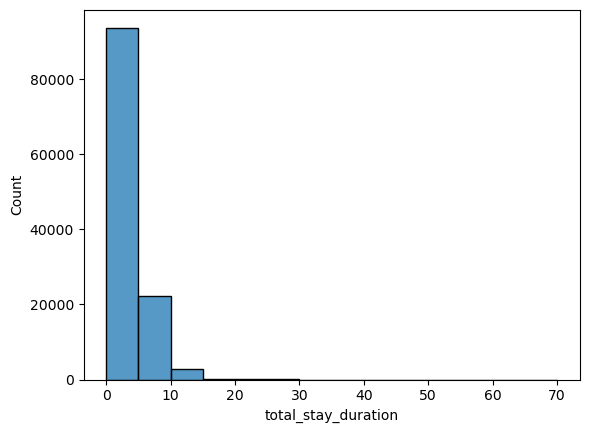

In [37]:
# total distribution
sns.histplot(df_c['total_stay_duration'], binwidth=5)

In [38]:
unique = df_c['total_stay_duration'].nunique()
mx = df_c['total_stay_duration'].max()
mn = df_c['total_stay_duration'].min()

print('Unique value:', unique)
print('Max duration:', mx)
print('Min duration:', mn)

Unique value: 42
Max duration: 69
Min duration: 0


Key Takeaways :
The customer's total stay duration ranges from 0 to 69 days. To facilitate interpretation, a weekly duration category will be created
- **< 1** : 0 - 7 days
- **1 - 2** : 8 - 14 days
- **2 - 3** : 15 - 21 days
- **2 - 4** : 22 - 28 days
- **> 4** : > 28 days

In [39]:
df_c['total_stay_week'] = np.where((df_c['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_c['total_stay_duration']) < 15, '1-2',
                                   np.where((df_c['total_stay_duration']) < 22, '2-3', 
                                   np.where((df_c['total_stay_duration']) < 29, '3-4', '> 4'))))

In [40]:
df_c['total_stay_week'].value_counts()

< 1    113979
1-2      4795
2-3       274
3-4       108
> 4        47
Name: total_stay_week, dtype: int64

<br>

### Cancelation Rate by Stay Duration
---

In [41]:
# group cancel rate based on total type,duration
cancel_rate = df_c.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted by week
week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32403,77939,42.0
8,Resort Hotel,< 1,9917,36040,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1077,3726,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


#### Visualization

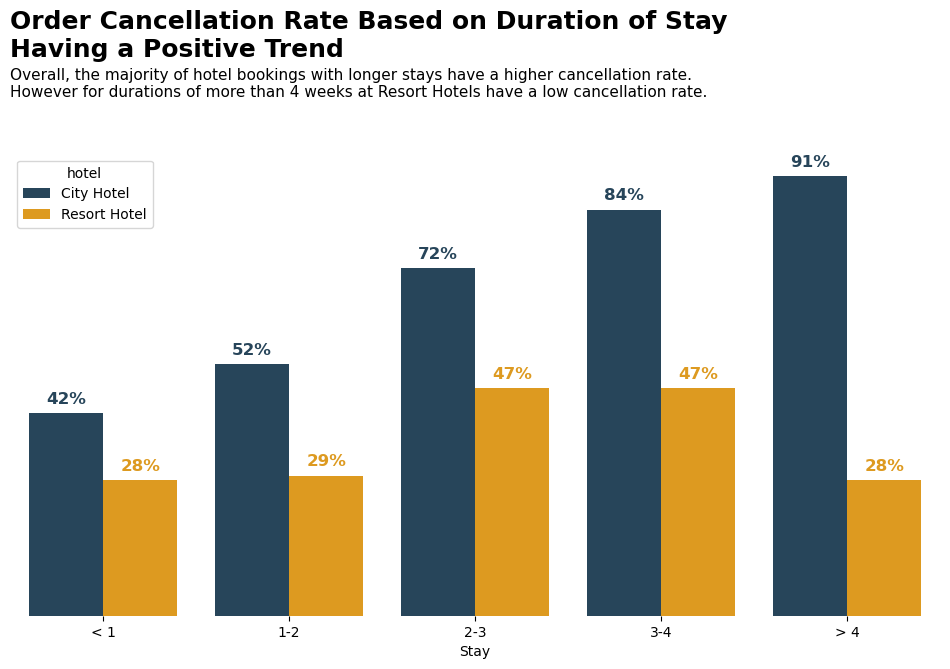

In [42]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# -----------------------------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f4762', '#fda300'])

# -----------------------------------------------------------------------------------------------------------------------------
# set labels
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('Stay')

# -----------------------------------------------------------------------------------------------------------------------------
# add a title and description
plt.title('Order Cancellation Rate Based on Duration of Stay \nHaving a Positive Trend', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 110, x = -0.5, s = 'Overall, the majority of hotel bookings with longer stays have a higher cancellation rate. \nHowever for durations of more than 4 weeks at Resort Hotels have a low cancellation rate.',
         ha='left', va='center', size=11)


# -----------------------------------------------------------------------------------------------------------------------------
patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

Key Takeaways:
- **Cancellation rate will be higher along with the length of stay booked at both types of hotels**.
- At City Hotels for a duration of stay of more than 2 weeks has a Cancelation Rate of more than 50%, moreover for a duration of stay of more than a month only 1 out of 10 people does not cancel their order. The cancellation rate is quite high so that the company must be able to determine the right strategy to minimize the cancellation rate that occurs.

 <br>
 <br>

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

This analysis focuses on looking at trends in lead time or waiting periods (distance between hotel bookings and arrival times) and the rate of cancellation of hotel bookings.


### Duration of Lead Time
---

To see the range of waiting periods in the dataset, it can be seen from the histogram distribution

<Axes: xlabel='lead_time', ylabel='Count'>

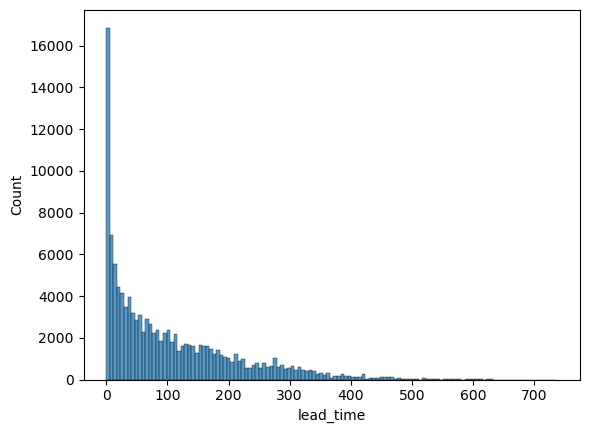

In [43]:
# distribution of lead times
sns.histplot(df_c['lead_time'])

In [44]:
unique = df_c['lead_time'].nunique()
mx = df_c['lead_time'].max()
mn = df_c['lead_time'].min()

print('Unique value:', unique)
print('Max duration:', mx)
print('Min duration:', mn)

Unique value: 479
Max duration: 737
Min duration: 0


Lead time has a range of 0 to 709 days, to facilitate interpretation a conversation categorization will be made.

In [45]:
df_c['lead_category'] = np.where((df_c['lead_time']) < 31, '1',
                        np.where((df_c['lead_time']) <= 61, '2',
                        np.where((df_c['lead_time']) <= 91, '3', 
                        np.where((df_c['lead_time']) <= 121, '4',
                        np.where((df_c['lead_time']) <= 151, '5',
                        np.where((df_c['lead_time']) <= 181, '6',
                        np.where((df_c['lead_time']) <= 211, '7', 
                        np.where((df_c['lead_time']) <= 241, '8',
                        np.where((df_c['lead_time']) <= 271, '9',
                        np.where((df_c['lead_time']) <= 301, '10', 
                        np.where((df_c['lead_time']) <= 331, '11',
                        np.where((df_c['lead_time']) <= 361, '12', '>1 year'))))))))))))

In [46]:
# check the column
df_c['lead_category'].value_counts()

1          38578
2          17462
3          12398
4          10359
5           8237
6           7784
7           5609
8           4180
10          3524
>1 year     3405
9           3377
11          2581
12          1709
Name: lead_category, dtype: int64

<br>

### Cancelation Rate by Lead Time
---

In [47]:
# summmary
lead_cancel = df_c.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 year']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23243,22.0
13,Resort Hotel,1,1984,15335,13.0
4,City Hotel,2,4802,12253,39.0
17,Resort Hotel,2,1593,5209,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2537,41.0
7,City Hotel,5,2574,5700,45.0


#### **Visualization**

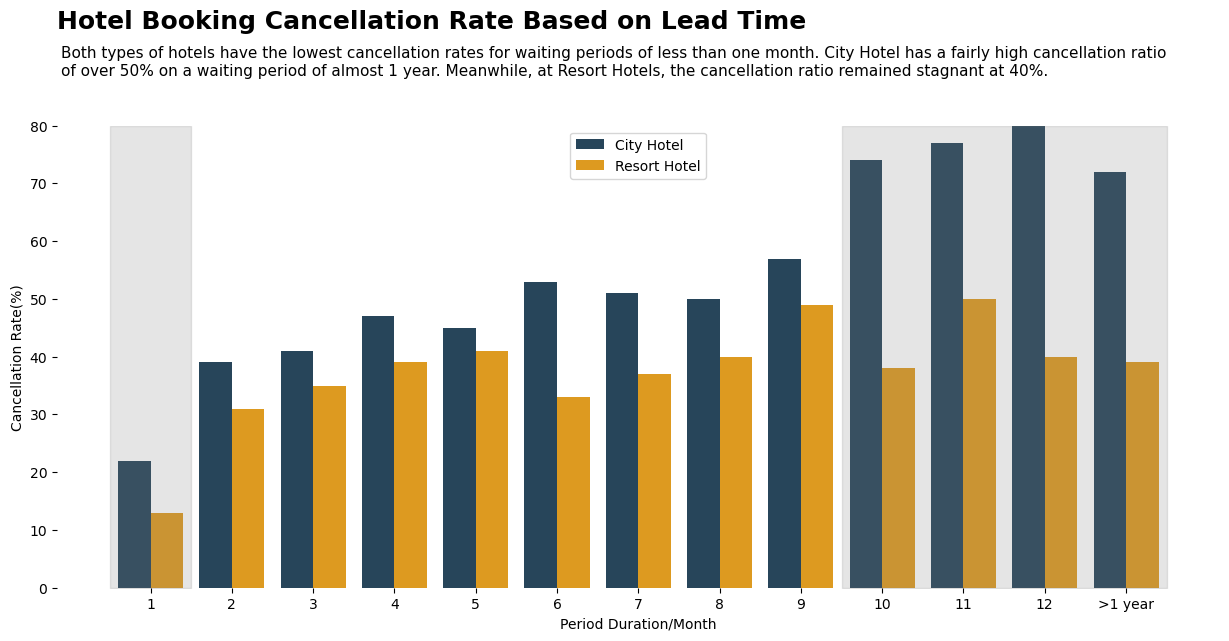

In [48]:
# create data visualizations
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15,6)

# -----------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = lead_cancel['lead_category'], y = lead_cancel['lead_cr'], hue=lead_cancel['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f4762', '#fda300'])
plt.ylim(0,80)

# -----------------------------------------------------------------------------------------------------------
# set labels
plt.ylabel('Cancellation Rate(%)')
plt.xlabel('Period Duration/Month')
plt.legend(loc='upper center')

# -----------------------------------------------------------------------------------------------------------
# add a title and description
plt.title('Hotel Booking Cancellation Rate Based on Lead Time', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 91, x = -1.1, s = 'Both types of hotels have the lowest cancellation rates for waiting periods of less than one month. City Hotel has a fairly high cancellation ratio \nof over 50% on a waiting period of almost 1 year. Meanwhile, at Resort Hotels, the cancellation ratio remained stagnant at 40%.',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------
# set cr 
plt.stackplot([-0.5, 0.5], [80], color='grey', alpha=0.2)
plt.stackplot([8.5, 12.5], [80], color='grey', alpha=0.2)

Key Takeaways:
- The cancellation rate based on waiting period is still **dominated by City Hotels**, with the cancellation rate tending to be high when the waiting period is almost one year.
- By looking at the low Cancelation Rate during the waiting period of around under one month, **companies can make hotel booking terms with a maximum order limit** to avoid the opportunity for customers to cancel orders due to the possibility of changing their mind or finding another hotel that is more desirable. <br>
<br>

# **Conclusion**

#### Business Questions Answer <br>
---

#### What types of hotels are most frequently visited by customers?

Overall City Hotel booked 66.41% more customers, with a significant increase in customer numbers occurring during the May-July and October-December holiday seasons. Resort hotels tend to be stagnant with a relatively small increase in the holiday season compared to city hotels.<br>
<br>

#### Does the length of stay affect the cancellation rate of hotel bookings?

The cancellation rate will be higher along with the length of stay booked at both types of hotels, moreover City Hotel has a cancellation rate of more than 70 - 90% for stays of more than 3 weeks. <br>
<br>

#### Does the time gap between a hotel reservation and the day a guest arrives affect the cancellation rate of hotel bookings?
The cancellation rate will be higher along with the waiting period for both types of hotels. The lowest cancellation when the waiting period is under one month.
<br>
<br>